This time, try using just a single channel. It probably has more statistically representative properties.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
initial_snippet = np.fromfile('/home/mwootten/school/research/ATS1.raw32', dtype=np.dtype('i4'), count=20000)

In [3]:
pd.DataFrame(initial_snippet).describe()

,0
count,20000.00000
mean,19.01985
std,783.17162
min,-3841.00000
25%,-384.00000
50%,34.00000
75%,487.00000
max,3577.00000


Basically, what I'm trying to do is write a low-pass filter, to smooth out the noisy input data so it is a little nicer for the derivative step. [Wikipedia](https://en.wikipedia.org/wiki/Low-pass_filter#Simple_infinite_impulse_response_filter) helpfully gives the following psuedocode:
```
 // Return RC low-pass filter output samples, given input samples,
 // time interval dt, and time constant RC
 function lowpass(real[0..n] x, real dt, real RC)
   var real[0..n] y
   var real α := dt / (RC + dt)
   y[0] := α * x[0]
   for i from 1 to n
       y[i] := α * x[i] + (1-α) * y[i-1]
   return y
```

Fortunately, Python is basically executable psuedocode.

In [5]:
def lowpass(x, dt, RC):
    y = []
    α = dt / (RC + dt)
    y.append(α * x[0])
    for i in range(1, len(x)):
        y.append(α * x[i] + (1-α) * y[i-1])
    return y

In [6]:
def plot_array(y):
    x = np.arange(0, len(y), 1)
    plt.plot(x, y)
    plt.show()

In [10]:
def plot_smoothing(dt, RC):
    plot_array(lowpass(initial_snippet, dt, RC))

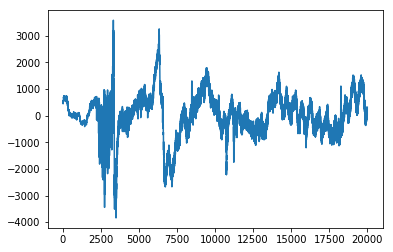

In [8]:
plot_array(initial_snippet)

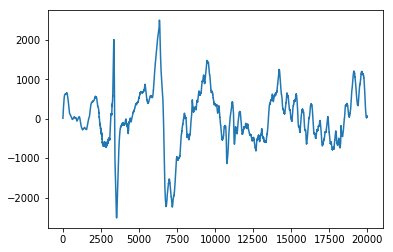

In [11]:
plot_smoothing(1, 50)

I don't 100% know what I just did, but that looks a heck of a lot better.

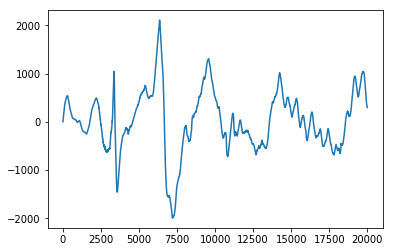

In [12]:
plot_smoothing(1, 150)

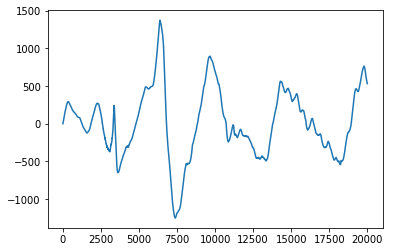

In [13]:
plot_smoothing(1, 500)

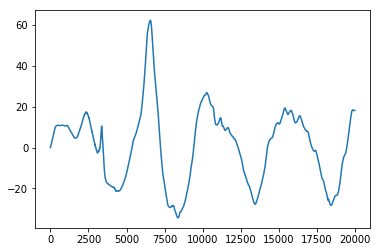

In [24]:
plot_smoothing(1, 20000)

This is starting to look like about maximum smoothness, at least visually. Hopefully on a massively thinned plot like this, the peaks and valleys will be more noticable, well-defined, and meaningful.